In [11]:


"""
    t, y = myeulersv(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a matrix of correspondinig values
of the solution, y(t_i)
"""
function myeulersv(fun, a, b, n, y1)
    t = range(a, b, n)
    neqs = length(y1)
    dydt = zeros(neqs) #allocate vector of derivatives
    y = zeros(neqs, n) #allocate the matrix of solution
    h = t[2] - t[1]
    y[:, 1] = y1
    for i = 1:n-1
        k1 = h*fun(t[i], y[:, i])
        y[:, i+1] = y[:, i] + k1
    end
    return t, y
end

myeulersv

In [12]:

"""
   dy/dt = funv(t,y) 

Right hand side of the oscillator with friction
"""
function frict(t, y) #oscillates with friction
    dydt = zeros(2) 
    dydt[1] = y[2]
    dydt[2] = -y[1] - y[2]
    return dydt
end 

frict

In [13]:

a = 0.0
b = 10.0 
n = 100
y1 = [1.0, 0.0]

2-element Vector{Float64}:
 1.0
 0.0

In [14]:

t, y =  myeulersv(frict, a, b, n, y1)

(0.0:0.10101010101010101:10.0, [1.0 1.0 … -0.006372540748269553 -0.00682207512369449; 0.0 -0.10101010101010101 … -0.0044503903167068684 -0.00335716495660824])

In [17]:

using PyPlot

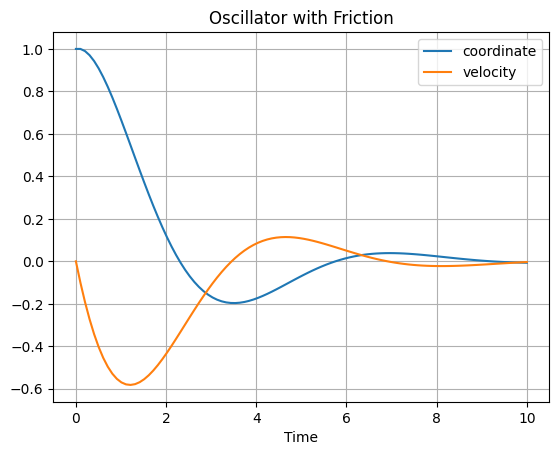

PyObject Text(0.5, 24.0, 'Time')

In [19]:

plot(t, y[1, :], label = "coordinate")
plot(t, y[2, :], label ="velocity")
grid(true) 
title("Oscillator with Friction")
legend()
xlabel("Time")

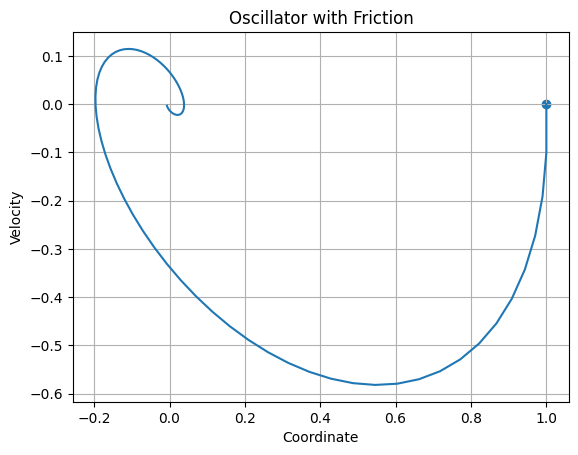

PyObject Text(24.000000000000007, 0.5, 'Velocity')

In [22]:

plot(y[1, :] , y[2, :])
grid(true) 
scatter(y1...) #shows where we start
title("Oscillator with Friction")
xlabel("Coordinate")
ylabel("Velocity")